In [1]:
import polars as pl
import matplotlib.pyplot as plt

In [2]:
nba_data_file = pl.read_csv("2023-2024 NBA Player Stats - Regular.csv", encoding="ISO-8859-1", separator=";")
nba_data_file.tail(5)

Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
i64,str,str,i64,str,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
568,"""Thaddeus Young""","""PF""",35,"""PHO""",10,0,8.9,1.1,2.1,0.524,0.0,0.1,0.0,1.1,2.0,0.55,0.524,0.1,0.3,0.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
569,"""Trae Young""","""PG""",25,"""ATL""",54,54,36.0,8.0,18.7,0.43,3.2,8.7,0.373,4.8,10.0,0.479,0.516,6.4,7.5,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
570,"""Omer Yurtseven""","""C""",25,"""UTA""",48,12,11.4,2.1,3.8,0.538,0.1,0.5,0.208,2.0,3.3,0.588,0.552,0.4,0.6,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
571,"""Cody Zeller""","""C""",31,"""NOP""",43,0,7.4,0.6,1.4,0.419,0.0,0.1,0.333,0.6,1.4,0.424,0.427,0.5,0.9,0.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8
572,"""Ivica Zubac""","""C""",26,"""LAC""",68,68,26.4,5.0,7.6,0.649,0.0,0.0,0.0,5.0,7.6,0.649,0.649,1.8,2.4,0.723,2.9,6.3,9.2,1.4,0.3,1.2,1.2,2.6,11.7


In [3]:
describe_value = nba_data_file.select(pl.col("Age")).describe()
median_value = nba_data_file.select([pl.col("Age").median()])
new_rows = pl.DataFrame({
    "statistic": "median",
    "Age": nba_data_file.select([pl.col("Age").median()])
})
describe_value = describe_value.vstack(new_rows)
describe_value

statistic,Age
str,f64
"""count""",735.0
"""null_count""",0.0
"""mean""",26.155102
"""std""",4.371745
"""min""",19.0
"""25%""",23.0
"""50%""",25.0
"""75%""",29.0
"""max""",39.0


In [4]:
grouped_multiple_data = nba_data_file.group_by(["Pos", "Tm"]).agg([
    pl.col("PTS").sum().alias("Total_Points"),
    pl.col("Pos").count().alias("Player_Count")
])

In [5]:
grouped_multiple_data

Pos,Tm,Total_Points,Player_Count
str,str,f64,u32
"""PF""","""WAS""",40.1,4
"""C""","""SAC""",27.4,4
"""PF""","""CLE""",39.0,6
"""SF-SG""","""TOT""",12.1,1
"""PG""","""PHI""",57.1,7
…,…,…,…
"""SG""","""POR""",47.0,4
"""SF""","""POR""",25.1,5
"""SG""","""TOR""",85.4,9


In [6]:
pivot_df = grouped_multiple_data.pivot(index='Tm', columns='Pos', values='Total_Points').fill_nan(0)

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_38324/831873728.py:1: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  pivot_df = grouped_multiple_data.pivot(index='Tm', columns='Pos', values='Total_Points').fill_nan(0)


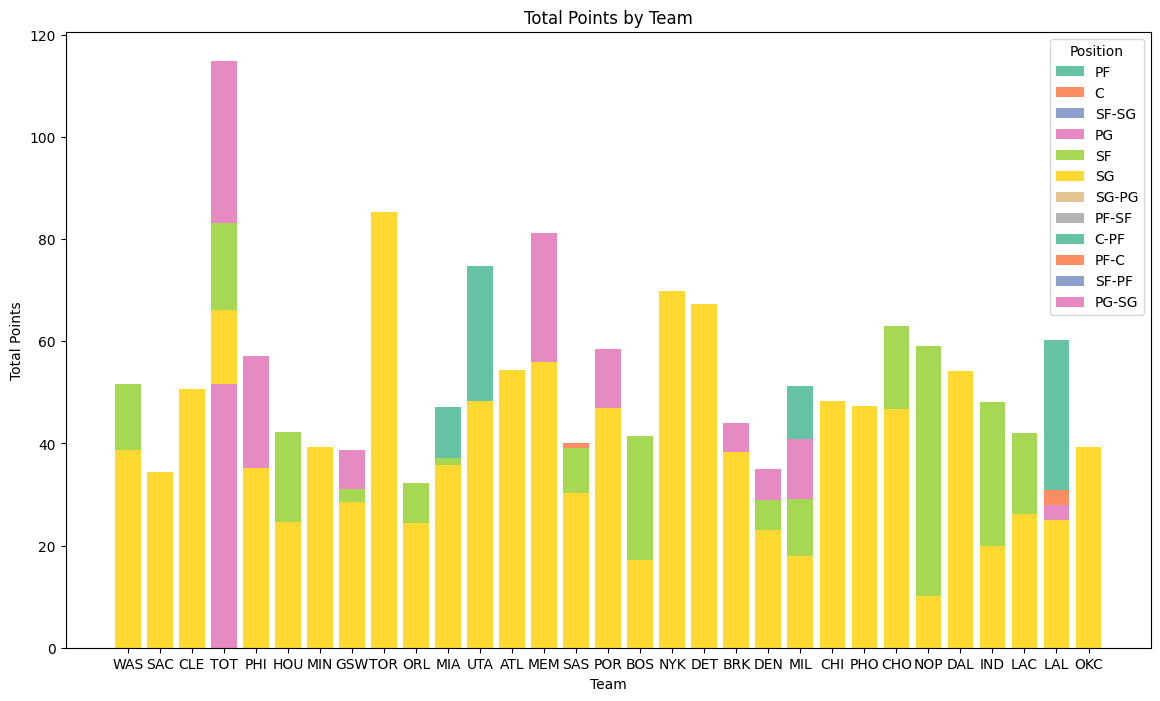

In [7]:
# Convert the Polars DataFrame to a format suitable for Matplotlib
teams = pivot_df['Tm'].to_numpy()
positions = pivot_df.columns[1:]  # Exclude 'Tm'
values = pivot_df.drop('Tm').to_numpy()

# Create a bar plot
fig, ax = plt.subplots(figsize=(14, 8))

# Define colors
colors = plt.get_cmap('Set2').colors

# Plot each position separately
for i, pos in enumerate(positions):
    ax.bar(teams, values[:, i], label=pos, color=colors[i % len(colors)])

# Add titles and labels
plt.title('Total Points by Team')
plt.xlabel('Team')
plt.ylabel('Total Points')

# Add legend
plt.legend(title='Position')

# Show the plot
plt.show()

In [8]:
grouped_data = nba_data_file.group_by("Pos").agg(
    pl.col("PTS").sum().alias("Total_Points"),
    pl.col("Pos").count().alias("Player_Count")
)

In [9]:
grouped_data

Pos,Total_Points,Player_Count
str,f64,u32
"""SG""",1250.2,154
"""PF-SF""",5.7,1
"""PG""",1270.2,147
"""C""",919.8,119
"""SF""",1119.9,155
…,…,…
"""SG-PG""",3.3,1
"""SF-SG""",12.1,1
"""PF""",1215.0,147


In [10]:
grouped_data = grouped_data.select([
    pl.col("Pos"),
    pl.col("Total_Points"),
    pl.col("Player_Count"),
    (pl.col("Total_Points") / pl.col("Player_Count")).alias("avg_point_per_player")
])


In [11]:
grouped_data

Pos,Total_Points,Player_Count,avg_point_per_player
str,f64,u32,f64
"""SG""",1250.2,154,8.118182
"""PF-SF""",5.7,1,5.7
"""PG""",1270.2,147,8.640816
"""C""",919.8,119,7.729412
"""SF""",1119.9,155,7.225161
…,…,…,…
"""SG-PG""",3.3,1,3.3
"""SF-SG""",12.1,1,12.1
"""PF""",1215.0,147,8.265306


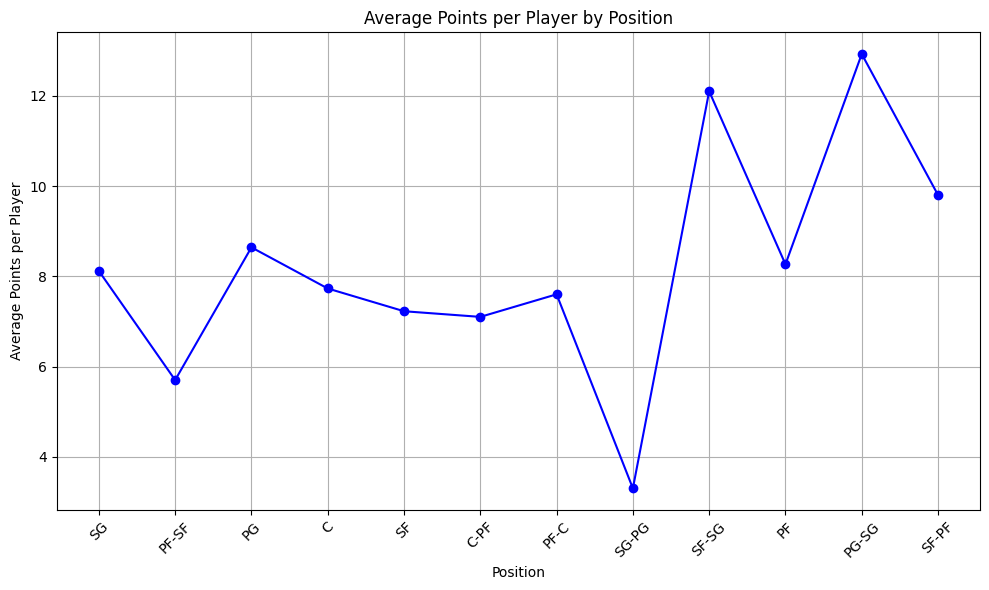

In [12]:
positions = grouped_data['Pos'].to_numpy()
avg_points = grouped_data['avg_point_per_player'].to_numpy()

# Create a line plot using Matplotlib
plt.figure(figsize=(10, 6))

# Plot the average points per player
plt.plot(positions, avg_points, marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Average Points per Player by Position')
plt.xlabel('Position')
plt.ylabel('Average Points per Player')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


In [13]:
nba_data_file.describe()

statistic,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
str,f64,str,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",735.0,"""735""","""735""",735.0,"""735""",735.0,735.0,735.0,735.0,735.0,735.0,735.0,735.0,735.0,735.0,735.0,735.0,735.0,735.0,735.0,735.0,735.0,735.0,735.0,735.0,735.0,735.0,735.0,735.0,735.0
"""null_count""",0.0,"""0""","""0""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",282.209524,null,null,26.155102,null,40.880272,18.440816,18.264762,2.972789,6.423401,0.442687,0.909116,2.582449,0.29709,2.062721,3.840408,0.510494,0.510079,1.170884,1.509252,0.689493,0.822041,2.423265,3.239184,1.93415,0.587347,0.383946,0.943946,1.456735,8.022313
"""std""",166.858903,null,null,4.371745,null,25.581293,25.024108,9.735524,2.356999,4.783384,0.119501,0.848969,2.166629,0.153458,1.873121,3.340812,0.151938,0.126048,1.2996,1.585758,0.255147,0.73277,1.741203,2.320766,1.800255,0.393774,0.400733,0.758414,0.784284,6.481825
"""min""",1.0,"""A.J. Green""","""C""",19.0,"""ATL""",1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",141.0,null,null,23.0,null,17.0,0.0,10.6,1.3,3.0,0.4,0.2,0.9,0.25,0.7,1.5,0.474,0.481,0.3,0.5,0.658,0.3,1.1,1.6,0.7,0.3,0.1,0.4,0.9,3.4
"""50%""",290.0,null,null,25.0,null,41.0,5.0,17.2,2.3,5.0,0.446,0.7,2.1,0.336,1.5,2.8,0.528,0.529,0.8,1.0,0.76,0.6,2.1,2.8,1.3,0.5,0.3,0.7,1.4,6.1
"""75%""",424.0,null,null,29.0,null,65.0,29.0,26.5,4.2,8.7,0.5,1.4,3.7,0.384,2.9,5.3,0.58,0.575,1.5,2.0,0.833,1.1,3.4,4.3,2.6,0.8,0.5,1.3,2.0,11.1
"""max""",572.0,"""Zion Williamson""","""SG-PG""",39.0,"""WAS""",84.0,82.0,37.8,11.5,23.6,0.8,4.8,11.8,1.0,11.0,18.3,1.0,0.917,10.2,11.6,1.0,4.6,10.1,13.7,10.9,2.1,3.6,4.4,3.6,34.7
